<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Assignmnet12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

Github link:

**1. Dataset Preparation**

*Load the dataset using TensorFlow/Keras.*

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import tensorflow as tf

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


*Visualize sample images from each class to understand the variety within the datasets.*

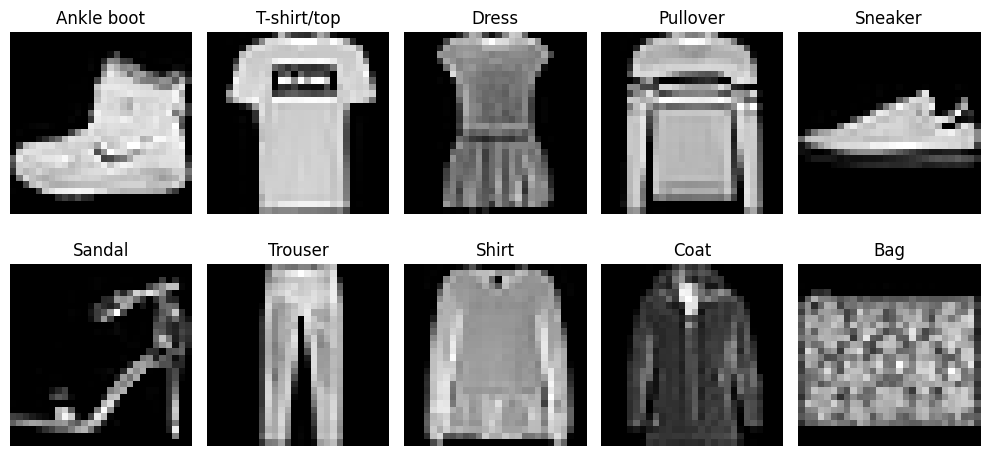

In [2]:
import matplotlib.pyplot as plt

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Displaying sample images from each class
plt.figure(figsize=(10, 5))
shown_classes = set()
i = 0
while len(shown_classes) < 10:
    label = y_train[i]
    if label not in shown_classes:
        plt.subplot(2, 5, len(shown_classes) + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(class_names[label])
        plt.axis('off')
        shown_classes.add(label)
    i += 1

plt.tight_layout()
plt.show()


**2. Image Preprocessing**

*Normalization*

In [3]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [4]:
# One-hot encode labels

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
# Split training data into train + validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=42)

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

*Data Augmentation (optional)*

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit generator to training data
datagen.fit(X_train)

# This generates new, slightly altered versions of the training images (rotated, shifted, flipped), helping the model generalize better.

**3. Neural Network Implementation**

*Model Architecture*

In [8]:
# Construct a simple feedforward neural network with at least one hidden layer.
# Use ReLU activation functions for the hidden layers and a Softmax output layer.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


*Compilation*

In [9]:
# Compile the model with the Adam optimizer, categorical crossentropy as the loss function, and accuracy as the metric.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


*Training*

In [10]:
# Train the model on the training set using batch sizes of 32 or 64 for 10 to 20 epochs.
# Use a validation split or separate validation data to monitor performance during training.

history = model.fit(datagen.flow(X_train, y_train_cat, batch_size=64),
                    epochs=15,
                    validation_data=(X_val, y_val_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.5529 - loss: 1.1947 - val_accuracy: 0.7615 - val_loss: 0.6364
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.6987 - loss: 0.7982 - val_accuracy: 0.7830 - val_loss: 0.6006
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.7173 - loss: 0.7483 - val_accuracy: 0.7797 - val_loss: 0.5777
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.7260 - loss: 0.7211 - val_accuracy: 0.7937 - val_loss: 0.5584
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7355 - loss: 0.6981 - val_accuracy: 0.8017 - val_loss: 0.5401
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.7392 - loss: 0.6830 - val_accuracy: 0.8053 - val_loss: 0.5220
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7413 - loss: 0.6763 - val_accuracy: 0.7990 - val_loss: 0.5296
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.7531 - loss: 0.6628 - 

**4. Model Evaluation**


*Performance Metrics*

In [12]:
# Predict class probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
# Assess the model using accuracy, precision, recall, and F1-score on the test set.
# Present a confusion matrix and classification report to evaluate performance across all categories.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", round(acc, 4))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Accuracy score is considered good, so the model correctly predicts 82% of the images.

Test Accuracy: 0.8179

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.86      0.78      1000
     Trouser       0.94      0.97      0.96      1000
    Pullover       0.69      0.66      0.68      1000
       Dress       0.85      0.82      0.84      1000
        Coat       0.66      0.76      0.71      1000
      Sandal       0.91      0.92      0.92      1000
       Shirt       0.58      0.41      0.48      1000
     Sneaker       0.89      0.93      0.91      1000
         Bag       0.96      0.93      0.95      1000
  Ankle boot       0.95      0.91      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



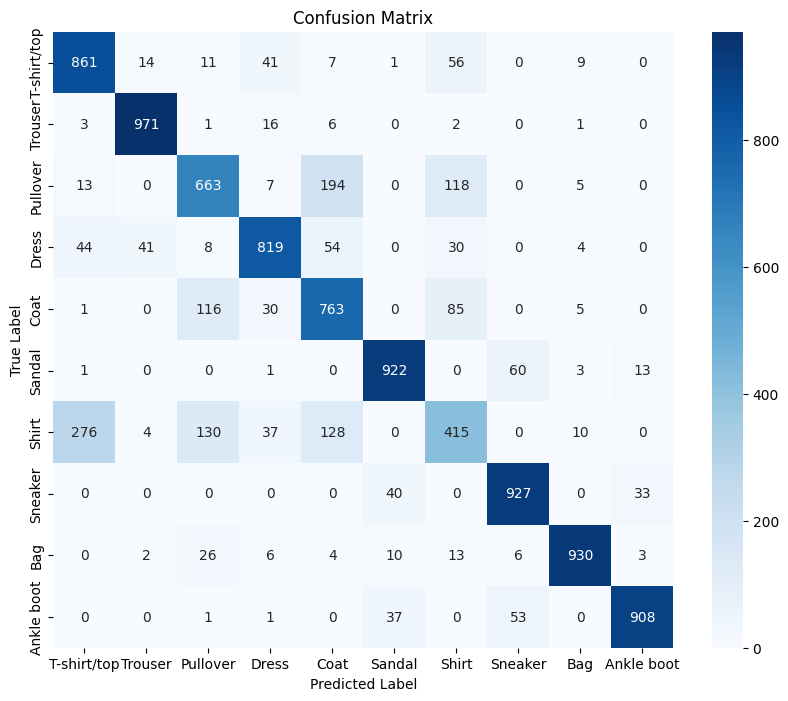

In [14]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


*Model Improvements*

In [15]:
# Experiment with different numbers of layers, layer sizes, and optimizers to improve accuracy.
# More layers and neurons can help capture more complex features, it will learn deeper patterns

# More layers
model_deep = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train_cat,
                              validation_data=(X_val, y_val_cat),
                              epochs=10, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6791 - loss: 0.8765 - val_accuracy: 0.8422 - val_loss: 0.4214
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8308 - loss: 0.4706 - val_accuracy: 0.8525 - val_loss: 0.3936
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8408 - loss: 0.4333 - val_accuracy: 0.8590 - val_loss: 0.3785
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8486 - loss: 0.4080 - val_accuracy: 0.8748 - val_loss: 0.3628
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8567 - loss: 0.3888 - val_accuracy: 0.8782 - val_loss: 0.3479
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8648 - loss: 0.3717 - val_accuracy: 0.8765 - val_loss: 0.3458
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8669 - loss: 0.3632 - val_accuracy: 0.8815 - val_loss: 0.3307
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8664 - loss: 0.3607 - val_acc

In [16]:
# An optimizer other than Adam

from tensorflow.keras.optimizers import RMSprop

model_rmsprop = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_rmsprop.compile(optimizer='RMSprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(X_train, y_train_cat,
                                    validation_data=(X_val, y_val_cat),
                                    epochs=10, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7274 - loss: 0.7767 - val_accuracy: 0.8447 - val_loss: 0.4200
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8366 - loss: 0.4440 - val_accuracy: 0.8395 - val_loss: 0.4218
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8546 - loss: 0.3975 - val_accuracy: 0.8678 - val_loss: 0.3596
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8664 - loss: 0.3689 - val_accuracy: 0.8623 - val_loss: 0.3651
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8706 - loss: 0.3615 - val_accuracy: 0.8770 - val_loss: 0.3350
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8744 - loss: 0.3489 - val_accuracy: 0.8838 - val_loss: 0.3364
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8740 - loss: 0.3436 - val_accuracy: 0.8825 - val_loss: 0.3268
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8788 - loss: 0.3348 - val_accuracy: 0

In [17]:
# Evaluate the impact of data augmentation on model performance.

# With augmentation
history_aug = model.fit(datagen.flow(X_train, y_train_cat, batch_size=64),
                        validation_data=(X_val, y_val_cat),
                        epochs=15)

# Without augmentation
history_plain = model.fit(X_train, y_train_cat,
                          validation_data=(X_val, y_val_cat),
                          batch_size=64, epochs=15)


Epoch 1/15
  1/844 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.6875 - loss: 0.8513

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.7662 - loss: 0.6172 - val_accuracy: 0.8172 - val_loss: 0.4770
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7673 - loss: 0.6118 - val_accuracy: 0.8098 - val_loss: 0.4852
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.7709 - loss: 0.6068 - val_accuracy: 0.8225 - val_loss: 0.4822
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.7668 - loss: 0.6135 - val_accuracy: 0.8192 - val_loss: 0.4847
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.7719 - loss: 0.5988 - val_accuracy: 0.8183 - val_loss: 0.4872
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.7731 - loss: 0.5979 - val_accuracy: 0.8195 - val_loss: 0.4685
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.7760 - loss: 0.5927 - val_accuracy: 0.8227 - val_loss: 0.4688
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.7713 - loss: 0.5984 - val_accurac

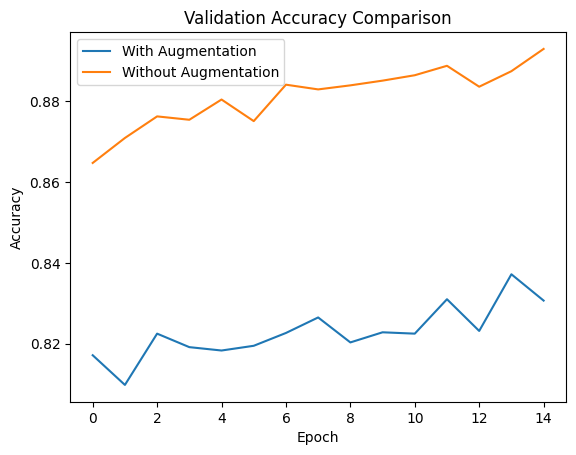

In [19]:
# Comparing validation accuracy for the impact of augmentation

plt.plot(history_aug.history['val_accuracy'], label='With Augmentation')
plt.plot(history_plain.history['val_accuracy'], label='Without Augmentation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
print("Baseline Accuracy:", round(history_plain.history['val_accuracy'][-1], 4))
print("With More Layers:", round(history_deep.history['val_accuracy'][-1], 4))
print("With RMSprop:", round(history_rmsprop.history['val_accuracy'][-1], 4))
print("With Augmentation:", round(history_aug.history['val_accuracy'][-1], 4))

# Accuracy actually decreased as we added more layers, used a different optimizer than Adam & used augmentation.

Baseline Accuracy: 0.8928
With More Layers: 0.881
With RMSprop: 0.8693
With Augmentation: 0.8307


**5. Application Demonstration**

*Practical Deployment Scenario*

*Discuss a hypothetical application of the trained model in a real-world scenario (e.g., digital media organization, fashion retail, or automated surveillance).*

A fashionm retail company can make use of this trained deep learning model to automatically tag an image of their clothing items to be able to classify them into different clothing categories on the website. This will reduce human intervention & ensure consistency in product categorization.

The image of each new item is uploaded on the website.
The image then goes through the model & the model classifies it.

The prediction is used to:
* Tag the product automatically.
* Sort items into correct categories.
* Provide personalized recommendations.



*Address potential operational issues like model scalability, real-time processing needs, and integration with existing technology.*

1. Model Scalability

If the platform sees high traffic like thousands of images uploaded in a short period of time, then a single server might not handle the load efficiently. This will cause slow response time, timeouts, or dropped predictions.

2. Data Drift

Over time, the images change with new fashion styles but the model is trained on older data. So the model accuracy decreases.

3. Real-Time Processing

The model might take too long to classify images, especially on limited hardware. This will cause poor user experience for real time applications.